In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.multivariate.manova as MANOVA


In [68]:
data = pd.read_excel("C:/Users/SUBRAT SAMAL/Desktop/autumn_24/supplier_ranking.xlsx")
#data.columns=[col_name.replace(" ","_").replace("'","") for col_name in data.columns]
data.head(5)




,supplier,quality,quantity,conditions and method of payment,serviceability and communicativeness of the supplier,reputation of the supplier and its competence,flexibility,financial condition of the supplier,condition of the supplier's assets,business results and number of employees,price,delivery time,supplier's location and traffic connections
0,1,4,350,3,3,4,4,4,3,5,5,2.0,50
1,2,2,350,2,5,4,3,5,4,6,7,3.0,60
2,3,2,450,3,6,5,4,7,8,9,8,4.0,30
3,4,4,260,3,6,8,5,7,8,9,7,1.0,40
4,5,3,170,3,7,6,2,6,5,4,7,2.0,35


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   supplier                                              35 non-null     int64  
 1   quality                                               35 non-null     int64  
 2   quantity                                              35 non-null     int64  
 3   conditions and method of payment                      35 non-null     int64  
 4   serviceability and communicativeness of the supplier  35 non-null     int64  
 5   reputation of the supplier and its competence         35 non-null     int64  
 6   flexibility                                           35 non-null     int64  
 7   financial condition of the supplier                   35 non-null     int64  
 8   condition of the supplier's assets                    35 non-n

In [70]:
data.describe()

,supplier,quality,quantity,conditions and method of payment,serviceability and communicativeness of the supplier,reputation of the supplier and its competence,flexibility,financial condition of the supplier,condition of the supplier's assets,business results and number of employees,price,delivery time,supplier's location and traffic connections
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000
mean,18.000000,3.371429,354.000000,2.914286,5.942857,6.171429,3.400000,5.828571,5.714286,6.20000,5.314286,2.557143,64.285714
std,10.246951,0.972738,175.167147,1.336621,1.781322,1.653618,0.847141,1.653618,1.544848,1.49115,1.658692,1.168026,37.920638
min,1.000000,2.000000,120.000000,1.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.00000,3.000000,0.500000,15.000000
25%,9.500000,3.000000,215.000000,2.000000,5.000000,5.000000,3.000000,4.000000,5.000000,5.00000,4.000000,2.000000,43.500000
50%,18.000000,3.000000,350.000000,3.000000,6.000000,6.000000,3.000000,6.000000,6.000000,6.00000,5.000000,3.000000,55.000000
75%,26.500000,4.000000,450.000000,4.000000,7.000000,8.000000,4.000000,7.000000,7.000000,7.00000,7.000000,3.000000,76.500000
max,35.000000,5.000000,870.000000,5.000000,9.000000,9.000000,5.000000,9.000000,8.000000,9.00000,8.000000,5.000000,220.000000


In [71]:
data.isnull().sum()

supplier                                                0
quality                                                 0
quantity                                                0
conditions and method of payment                        0
serviceability and communicativeness of the supplier    0
reputation of the supplier and its competence           0
flexibility                                             0
financial condition of the supplier                     0
condition of the supplier's assets                      0
business results and number of employees                0
price                                                   0
delivery time                                           0
supplier's location and traffic connections             0
dtype: int64

If quality is out target variable which is dependent on the other variable and then get weighted score of other variables to rank suppliers.

In [72]:

X=data.drop(columns=["supplier","quantity"]).drop(columns="quality").drop(columns="business results and number of employees")
Y=data['quality']


In [73]:
from sklearn.preprocessing import StandardScaler
SSC=StandardScaler()
scaled_X=SSC.fit_transform(X)


In [74]:
Y.value_counts()

3    13
4    10
2     7
5     5
Name: quality, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(scaled_X,Y,test_size=0.2,random_state=1)
X_train.shape, X_test.shape,Y_train.shape

((28, 9), (7, 9), (28,))

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [77]:
cl = RandomForestClassifier()

cl.fit(X_train,Y_train)
y_pred = cl.predict(X_test)

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.67      0.56      0.60         7
weighted avg       1.00      0.86      0.91         7



C:\Users\SUBRAT SAMAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUBRAT SAMAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUBRAT SAMAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
y_pred

array([3, 2, 4, 4, 3, 3, 3], dtype=int64)

In [79]:
Y_test

14    3
19    4
3     4
29    4
33    3
28    3
22    3
Name: quality, dtype: int64

In [80]:
feature_imp_randomforest = pd.DataFrame(columns=["feature", "importance"])

# Populate the DataFrame with feature names and their importances
for index in np.argsort(cl.feature_importances_):
    feature_imp_randomforest = feature_imp_randomforest.append(
        {"feature": X.columns[index], "importance": cl.feature_importances_[index]}, 
        ignore_index=True
    )

# Display the top features
feature_sorted=feature_imp_randomforest.sort_values(by='importance',ascending=False)
feature_sorted

C:\Users\SUBRAT SAMAL\AppData\Local\Temp\ipykernel_21708\1179321761.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_imp_randomforest = feature_imp_randomforest.append(
C:\Users\SUBRAT SAMAL\AppData\Local\Temp\ipykernel_21708\1179321761.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_imp_randomforest = feature_imp_randomforest.append(
C:\Users\SUBRAT SAMAL\AppData\Local\Temp\ipykernel_21708\1179321761.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_imp_randomforest = feature_imp_randomforest.append(
C:\Users\SUBRAT SAMAL\AppData\Local\Temp\ipykernel_21708\1179321761.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,feature,importance
8,price,0.178194
7,supplier's location and traffic connections,0.176223
6,delivery time,0.111296
5,flexibility,0.099894
4,serviceability and communicativeness of the su...,0.094274
3,conditions and method of payment,0.090252
2,reputation of the supplier and its competence,0.084101
1,financial condition of the supplier,0.083626
0,condition of the supplier's assets,0.08214


[-0.21493631 -0.12983249 -0.07731856 -0.06421192 -0.05528657  0.00258529
  0.00665652  0.05312455  0.09560335  0.27187043  0.27611138  0.27839698
  1.        ]


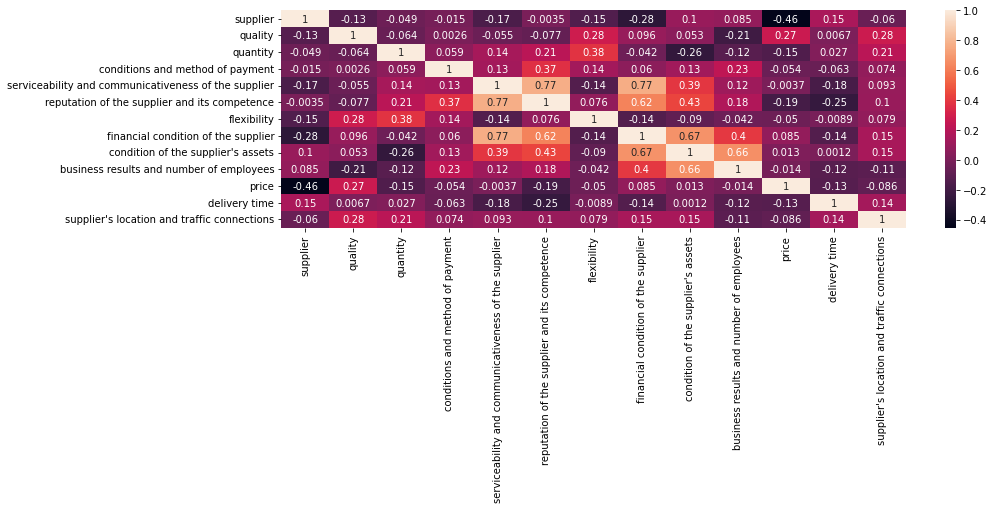

In [81]:
plt.figure(figsize=(14,4))
sns.heatmap(data.corr(),annot=True)
correlation_quality = data.corr()['quality']
print(np.sort(correlation_quality))

In [82]:
data.head(20)

,supplier,quality,quantity,conditions and method of payment,serviceability and communicativeness of the supplier,reputation of the supplier and its competence,flexibility,financial condition of the supplier,condition of the supplier's assets,business results and number of employees,price,delivery time,supplier's location and traffic connections
0,1,4,350,3,3,4,4,4,3,5,5,2.0,50
1,2,2,350,2,5,4,3,5,4,6,7,3.0,60
2,3,2,450,3,6,5,4,7,8,9,8,4.0,30
3,4,4,260,3,6,8,5,7,8,9,7,1.0,40
4,5,3,170,3,7,6,2,6,5,4,7,2.0,35
5,6,4,180,1,8,8,2,9,7,5,8,0.5,55
6,7,3,350,1,3,4,4,4,3,5,5,2.0,62
7,8,3,250,1,6,5,3,6,5,4,6,4.0,78
8,9,5,360,4,9,8,5,8,6,5,6,3.0,120
9,10,4,240,4,9,8,3,8,6,6,7,1.0,50


# svm model 

In [83]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset


# Define features (X) and target (y)
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Data scaling
scaler = StandardScaler()  # Standardize the features (mean=0, std=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Classifier (SVC) with a linear kernel
svm_model = SVC(kernel='linear', decision_function_shape='ovo')  # One-vs-One strategy for multiclass classification

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.1429
Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1

    accuracy                           0.14         7
   macro avg       0.12      0.08      0.10         7
weighted avg       0.21      0.14      0.17         7



In [84]:
result=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
result

,y_test,y_pred
22,3,2
34,2,3
14,3,5
13,4,5
3,4,5
33,3,3
18,5,4


In [85]:
importance=svm_model.coef_
importance
# for i in enumerate(np.argsort(importance)):
#     print(i)
# #     print(importance[i], X[i])

array([[ 0.04636188,  1.30790739,  0.11972593,  0.10914775, -0.21460438,
        -0.82575461, -0.24481039, -0.47125302,  0.82342369,  0.53363671,
        -0.18246751, -0.01878324],
       [-0.62917888,  0.50006396, -0.42573243,  0.59820093,  0.38624765,
        -0.39268374, -0.76943288,  0.174451  ,  0.98166662, -0.58113509,
         0.64957663, -0.27804779],
       [-0.15157685,  0.57943407, -0.0489558 ,  0.38026924,  0.16395416,
        -1.08252761, -0.15223426, -0.27608383,  0.5857141 ,  0.17640598,
        -0.25252222, -0.57401215],
       [-0.13995755, -1.04364372, -0.02791472,  0.26756061, -0.10660155,
        -0.22067157, -0.26491599,  0.6406792 , -0.17876258, -1.04205516,
         0.62801871, -0.3051833 ],
       [ 0.41430208, -0.19557858, -0.19192968, -0.20745612,  0.47554097,
        -0.88419185, -0.1814571 , -0.1504388 , -0.33653737, -0.38561728,
        -0.31133023, -0.41931929],
       [ 0.21605109,  0.41078224,  0.13046549, -0.01609648,  0.1736247 ,
        -0.34684946, -

In [86]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

# Load the dataset (assuming 'data' is already defined)
# data = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line as necessary

# Define features (X) and target (y)
X = data.drop(columns=['quality','business results and number of employees','supplier','quantity'])  # Features
y = data['quality']  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Data scaling
scaler = StandardScaler()  # Standardize the features (mean=0, std=1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Classifier (SVC) with a linear kernel
svm_model = SVC(kernel='linear', decision_function_shape='ovo')  # One-vs-One strategy for multiclass classification

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# Feature importance analysis
importance = np.abs(svm_model.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print("\nFeature Importance:\n", importance_df)


Accuracy: 0.1429
Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1

    accuracy                           0.14         7
   macro avg       0.12      0.08      0.10         7
weighted avg       0.21      0.14      0.17         7


Feature Importance:
                                              Feature  Importance
1  serviceability and communicativeness of the su...    0.704189
6                                              price    0.596997
8        supplier's location and traffic connections    0.479026
0                   conditions and method of payment    0.356486
2      reputation of the supplier and its competence    0.355423
3                                        flexibility    0.335573
4                financial condition of the sup

In [87]:
result=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
result


,y_test,y_pred
22,3,2
34,2,3
14,3,5
13,4,5
3,4,2
33,3,3
18,5,4


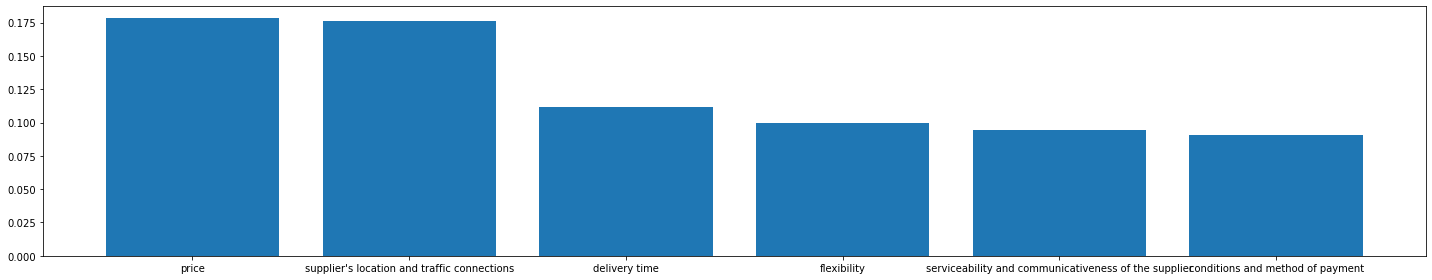

In [88]:
plt.figure(figsize=(20,4))
plt.bar(feature_sorted['feature'][:6],feature_sorted['importance'][:6])
plt.tight_layout()

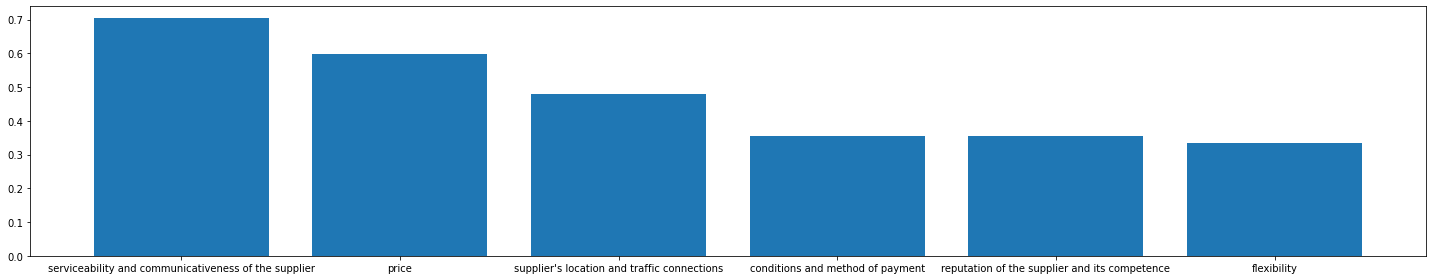

In [89]:
plt.figure(figsize=(20,4))
plt.bar(importance_df['Feature'][:6],importance_df['Importance'][:6])
plt.tight_layout()

In [94]:
from IPython.display import display, Markdown

display(Markdown("**Important factors for supplier selection**"))

important_features=pd.DataFrame({"SVM":importance_df['Feature'],"Random Forest":feature_sorted['feature']})
pd.set_option('display.max_colwidth', None)
#print("Important factors for supplier selection")
important_features.head()

**Important factors for supplier selection**

,SVM,Random Forest
0,conditions and method of payment,condition of the supplier's assets
1,serviceability and communicativeness of the supplier,financial condition of the supplier
2,reputation of the supplier and its competence,reputation of the supplier and its competence
3,flexibility,conditions and method of payment
4,financial condition of the supplier,serviceability and communicativeness of the supplier
